<a href="https://colab.research.google.com/github/villafue/Progamming/blob/main/Coding%20Interview/Take%20Home/Springboard/Unit%2027.3/relax_challenge/Relax_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions from the pdf

The data is available as two attached CSV files:

1. takehome_user_engagement. csv
2. takehome_users . csv

The data has the following two tables:

1. A user table ( **"takehome_users"** ) with data on 12,000 users who signed up for the
product in the last two years. This table includes:
```
● name: the user's name
● object_id: the user's id
● email: email address
● creation_source: how their account was created. This takes on one
of 5 values:
○ PERSONAL_PROJECTS: invited to join another user's
personal workspace
○ GUEST_INVITE: invited to an organization as a guest
(limited permissions)
○ ORG_INVITE: invited to an organization (as a full member)
○ SIGNUP: signed up via the website
○ SIGNUP_GOOGLE_AUTH: signed up using Google
Authentication (using a Google email account for their login
id)
● creation_time: when they created their account
● last_session_creation_time: unix timestamp of last login
● opted_in_to_mailing_list: whether they have opted into receiving
marketing emails
● enabled_for_marketing_drip: whether they are on the regular
marketing email drip
● org_id: the organization (group of users) they belong to
● invited_by_user_id: which user invited them to join (if applicable).
```
2. A usage summary table ( **"takehome_user_engagement"** ) that has a row for each day
that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .

We suggest spending 1-2
hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

In [1]:
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', None)


In [2]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use(['seaborn-whitegrid'])
sns.set_palette(palette = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"], n_colors = 4)
sns.set(context='notebook', palette='deep')

In [3]:
#df_users = pd.read_csv('https://raw.githubusercontent.com/villafue/Progamming/main/Coding%20Interview/Take%20Home/Springboard/Unit%2027.3/relax_challenge/takehome_users.csv')
#df_users.head()

This is the wrong encoder. I'll try something else.

In [4]:
df_users = pd.read_csv('https://raw.githubusercontent.com/villafue/Progamming/main/Coding%20Interview/Take%20Home/Springboard/Unit%2027.3/relax_challenge/takehome_users.csv', encoding = "ISO-8859-1",
                       parse_dates = ['creation_time', 'last_session_creation_time'])
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


In [5]:
df_users.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6000.500000,3464.245950,1.0,3000.75,6000.5,9000.25,12000.0
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.00,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.00,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.00,108.0,238.25,416.0
invited_by_user_id,6417.0,5962.957145,3383.761968,3.0,3058.00,5954.0,8817.00,11999.0


In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 937.6+ KB


Interesting, last_session_creation_time is still an object despite me stating it was a datetime object. 

In [7]:
df_usreng = pd.read_csv('https://raw.githubusercontent.com/villafue/Progamming/main/Coding%20Interview/Take%20Home/Springboard/Unit%2027.3/relax_challenge/takehome_user_engagement.csv', encoding = "ISO-8859-1", parse_dates = ['time_stamp'])
df_usreng.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
df_usreng.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [9]:
df_usreng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


I wonder which users logged-in the most. 

In [10]:
display(df_usreng.groupby('user_id')[['time_stamp', 'visited']].count().sort_values('visited', ascending=False))


,time_stamp,visited
user_id,,
3623,606,606
906,600,600
1811,593,593
7590,590,590
8068,585,585
...,...,...
4699,1,1
4698,1,1
4697,1,1


Wow, some of these users have over 600 visits during this time period

# Adopted Users

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .

First, I get all user ids

In [11]:
users = set(df_usreng['user_id'])
adopted_user = []

Next, I'm going to find all the users who logged in at least 3 days over a 7 day period. 

In [12]:
for i, user in enumerate(users):
    df_user = df_usreng[df_usreng.user_id == user]
    df_user = df_user[['time_stamp', 'user_id']]
    df_user = df_user.set_index('time_stamp')
    df_user['more_than_3'] = df_user.rolling(window = '7D').count()
    
    if max(df_user['more_than_3']) >= 3:
        adopted_user.append(user)
        
print(len(adopted_user) / len(users) * 100)

18.157089425365523


It looks like about 18% of users are considered adopted users.

# Predict Future User Adoption

Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday
period , identify which factors predict future user
adoption .

Next, I'm going back to the original users dataframe and identify who are adopted users.  

In [13]:
df_users['adopted_user'] = df_users['object_id'].apply(lambda x: x in adopted_user)
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0,False


I'm going to start preparing my data for modeling. First, I will grab the email domain. 

In [16]:
import re
df_users['domain'] = df_users['email'].apply(lambda x: re.search("@[\w.]+", x).group(0))
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0,False,@yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0,True,@gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0,False,@gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0,False,@yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0,False,@yahoo.com


Now, I'll drop some unnecessary features. This includes dates as I learned the hard way from the last take-home assignment.

In [17]:
df_users = df_users.drop(['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time'], axis = 1)
df_users.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,domain
0,GUEST_INVITE,1,0,11,10803.0,False,@yahoo.com
1,ORG_INVITE,0,0,1,316.0,True,@gustr.com
2,ORG_INVITE,0,0,94,1525.0,False,@gustr.com
3,GUEST_INVITE,0,0,1,5151.0,False,@yahoo.com
4,GUEST_INVITE,0,0,193,5240.0,False,@yahoo.com


In [18]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   invited_by_user_id          6417 non-null   float64
 5   adopted_user                12000 non-null  bool   
 6   domain                      12000 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 574.3+ KB


The "invited_by_user_id" column has about half of the information missing. I am tempted to drop the entire column but I'll see if I can model with missing information. 

Now, I will get dummy variables for my categorical variables. 

In [19]:
df_users = pd.get_dummies(df_users, columns = ['creation_source', 'domain'])
df_users.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,domain_@abdnf.com,domain_@adpql.com,domain_@aerbd.com,domain_@aethf.com,domain_@afzjt.com,domain_@agfei.com,domain_@aiouj.com,domain_@aipbl.com,domain_@ajrkw.com,domain_@akwfl.com,domain_@aldgv.com,domain_@amknl.com,domain_@amlsi.com,domain_@anmvu.com,domain_@anogl.com,domain_@aosyq.com,domain_@aotcc.com,domain_@aotdh.com,domain_@apagc.com,domain_@aqdqw.com,domain_@aqeyf.com,domain_@aqfdy.com,domain_@arhlj.com,domain_@arlem.com,domain_@aspsy.com,domain_@atury.com,domain_@avfnw.com,domain_@axpfh.com,domain_@bawmq.com,domain_@bbdkr.com,domain_@bberx.com,domain_@bchdw.com,domain_@bchfd.com,domain_@bcihn.com,domain_@bciky.com,domain_@bcilf.com,domain_@bdlvv.com,domain_@bdnfn.com,domain_@beszv.com,domain_@bfukq.com,domain_@bfvoj.com,domain_@bfwtg.com,domain_@bfxyd.com,domain_@bgdtm.com,domain_@bgdut.com,domain_@bgdwc.com,domain_@bhisp.com,domain_@bhjwj.com,domain_@bikch.com,domain_@biljj.com,domain_@binqn.com,domain_@bjtqb.com,domain_@bjtrd.com,domain_@bkwgm.com,domain_@bnklb.com,domain_@bnmwx.com,domain_@bosvd.com,domain_@bqbik.com,domain_@bqdse.com,domain_@breuo.com,domain_@brhlk.com,domain_@brjuu.com,domain_@bsjsm.com,domain_@bsmgs.com,domain_@bsmic.com,domain_@bsoph.com,domain_@btoph.com,domain_@btpuf.com,domain_@btrfw.com,domain_@btsil.com,domain_@bttmc.com,domain_@btusf.com,domain_@bvcwd.com,domain_@bxlng.com,domain_@bztur.com,domain_@bztuu.com,domain_@cauwd.com,domain_@cavde.com,domain_@cbbzw.com,domain_@cbxln.com,domain_@cbype.com,domain_@cbysr.com,domain_@cbyst.com,domain_@cceoj.com,domain_@cdhew.com,domain_@cdkrd.com,domain_@ceneg.com,domain_@ceoiv.com,domain_@ceqro.com,domain_@cfqpe.com,domain_@cfrwi.com,domain_@cfthc.com,domain_@cgbld.com,domain_@cgdsi.com,domain_@chcor.com,domain_@chdsg.com,domain_@cilfr.com,domain_@cjnmy.com,domain_@cjpwo.com,domain_@cjpwq.com,domain_@cksla.com,domain_@ckslb.com,domain_@cksld.com,domain_@ckuun.com,domain_@ckvbo.com,domain_@ckvwz.com,domain_@clbuw.com,domain_@clwdx.com,domain_@cmbwg.com,domain_@cmhvk.com,domain_@cnjik.com,domain_@cnkin.com,domain_@cnkkt.com,domain_@conxa.com,domain_@copkb.com,domain_@cptyp.com,domain_@cpugt.com,domain_@cpvie.com,domain_@crcly.com,domain_@crdnh.com,domain_@creup.com,domain_@crfxb.com,domain_@crfye.com,domain_@crgak.com,domain_@cshit.com,domain_@csiml.com,domain_@cslyn.com,domain_@csmdd.com,domain_@ctppi.com,domain_@curaa.com,domain_@cuvox.de,domain_@cuvrx.com,domain_@cuvvr.com,domain_@cvcvy.com,domain_@cvvth.com,domain_@cvwyc.com,domain_@cvzle.com,domain_@cwbpy.com,domain_@cwecb.com,domain_@cweei.com,domain_@cwgpf.com,domain_@cxiue.com,domain_@cxlhf.com,domain_@cylik.com,domain_@cymqs.com,domain_@cynti.com,domain_@cyqff.com,domain_@dariq.com,domain_@darkw.com,domain_@dbsor.com,domain_@dbspu.com,domain_@dbvdd.com,domain_@dbxmo.com,domain_@deltl.com,domain_@demvu.com,domain_@dfohs.com,domain_@dhafc.com,domain_@dieyg.com,domain_@dieyh.com,domain_@difbq.com,domain_@diged.com,domain_@dihjz.com,domain_@djkvd.com,domain_@djmie.com,domain_@djopl.com,domain_@djoqq.com,domain_@dkpsw.com,domain_@dmbrh.com,domain_@dmbtr.com,domain_@dmzpz.com,domain_@dnhuf.com,domain_@doiac.com,domain_@dppey.com,domain_@dpphp.com,domain_@dpqmm.com,domain_@dqsut.com,domain_@dqtzp.com,domain_@dqwln.com,domain_@dseth.com,domain_@dshfd.com,domain_@dshis.com,domain_@dtniy.com,domain_@dvseo.com,domain_@dvthf.com,domain_@dvtjm.com,domain_@dvyir.com,domain_@dwald.com,domain_@dwctl.com,domain_@dxjxn.com,domain_@dyjzw.com,domain_@dzpyd.com,domain_@eanqq.com,domain_@eaouk.com,domain_@ecbua.com,domain_@ecwgn.com,domain_@eeknk.com,domain_@eelqy.com,domain_@efkkv.com,domain_@egruv.com,domain_@egsva.com,domain_@egtdh.com,domain_@ehwrq.com,domain_@ejfbo.com,domain_@ekkwg.com,domain_@ekmhw.com,domain_@ekoql.com,domain_@elpty.com,domain_@elpuc.com,domain_@elqvg.com

In [20]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Columns: 1194 entries, opted_in_to_mailing_list to domain_@zwmry.com
dtypes: bool(1), float64(1), int64(3), uint8(1189)
memory usage: 14.0 MB


I will set my target variable and my features

In [21]:
target = 'adopted_user'
features = list(df_users.columns)
features.remove(target)

print('Features:', features)
print('Target:', target)

Features: ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH', 'domain_@abdnf.com', 'domain_@adpql.com', 'domain_@aerbd.com', 'domain_@aethf.com', 'domain_@afzjt.com', 'domain_@agfei.com', 'domain_@aiouj.com', 'domain_@aipbl.com', 'domain_@ajrkw.com', 'domain_@akwfl.com', 'domain_@aldgv.com', 'domain_@amknl.com', 'domain_@amlsi.com', 'domain_@anmvu.com', 'domain_@anogl.com', 'domain_@aosyq.com', 'domain_@aotcc.com', 'domain_@aotdh.com', 'domain_@apagc.com', 'domain_@aqdqw.com', 'domain_@aqeyf.com', 'domain_@aqfdy.com', 'domain_@arhlj.com', 'domain_@arlem.com', 'domain_@aspsy.com', 'domain_@atury.com', 'domain_@avfnw.com', 'domain_@axpfh.com', 'domain_@bawmq.com', 'domain_@bbdkr.com', 'domain_@bberx.com', 'domain_@bchdw.com', 'domain_@bchfd.com', 'domain_@bcihn.com', 'domain_@bciky.com', '

I will turn all my features into floats. 

In [22]:
for feature in features:
  df_users[feature] = df_users[feature].astype(float)
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Columns: 1194 entries, opted_in_to_mailing_list to domain_@zwmry.com
dtypes: bool(1), float64(1193)
memory usage: 109.2 MB
None


I had an issue with my target variable showing up in my feature importance graph. This is why I created the variable df_no_y.

In [23]:
df_no_y = df_users.drop('adopted_user', axis=1)
df_no_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Columns: 1193 entries, opted_in_to_mailing_list to domain_@zwmry.com
dtypes: float64(1193)
memory usage: 109.2 MB


In [24]:
X = df_no_y[features].values
y = df_users[target].values

I used XGBoost for feature importance as it is a very powerful algorithm. I also used it before in my capstone so it's the one I wanted to use. 

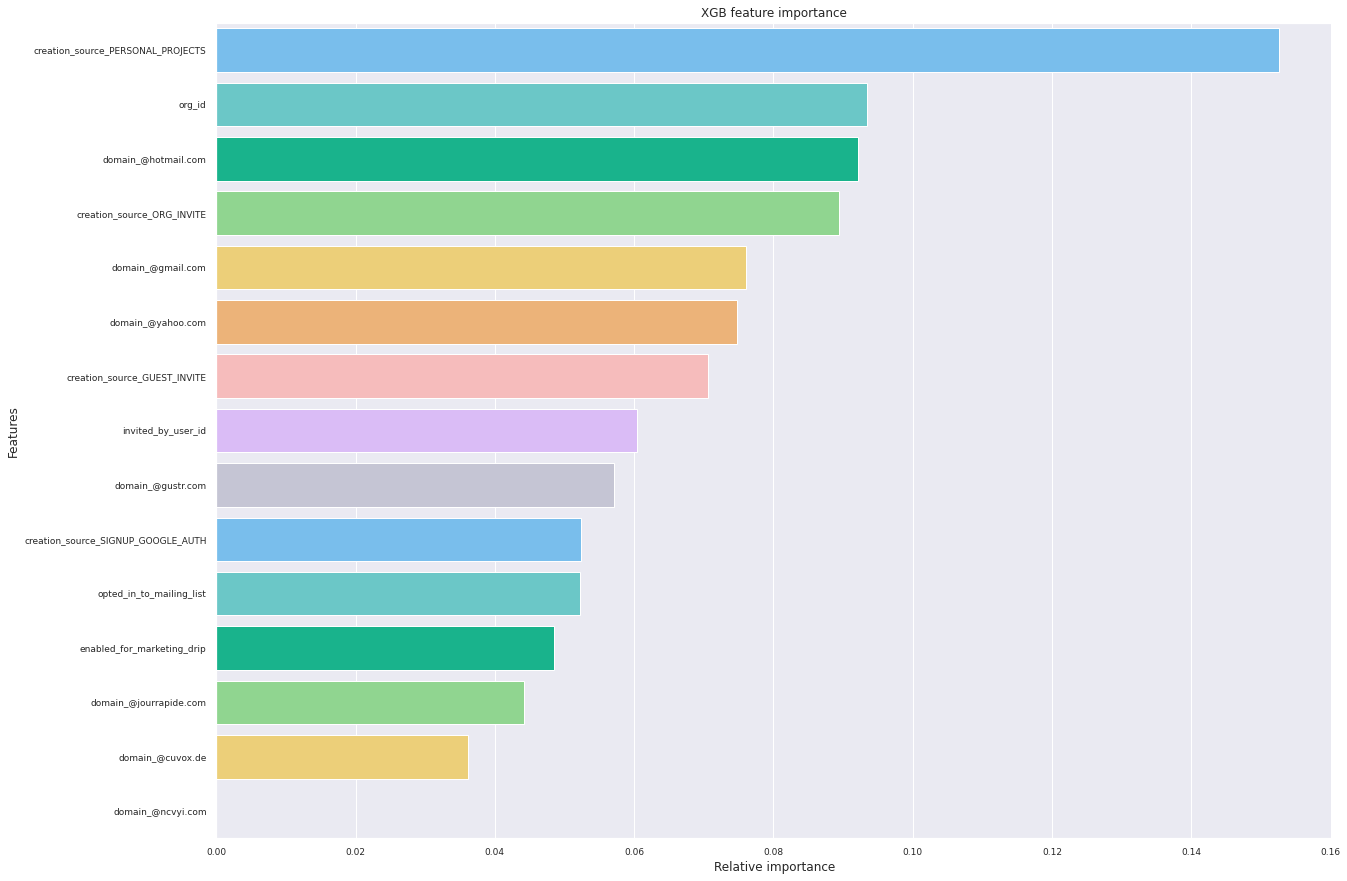

In [26]:
import xgboost as xgb
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
model = xgb.XGBClassifier(objective='binary:logistic')
model.fit(X, y)

# Sort feature importance
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:15]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=df_no_y.columns[indices], x = model.feature_importances_[indices], orient='h', palette = mycols)
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

Judging by the graph above, the most important feature would be personal projects. User adoption is associated with personal projects meaning they were invited to join another user's personal workspace. Furthermore, other strong associations came from specific organizations (org_id), organizational invites, and those with hotmail accounts. 

This makes sense as certain groups, organization invites, and invites to a person's workspace would all be valid reasons to keep a user to the platform. Further analysis could be which organizations contribute to the highest current user adoption. Furthermore, we can study what are the common attributes that keep users on the platform, and use that to either change or market the product in a way that promotes these factors.